
# Online learning of a dictionary of parts of faces

This example uses a large dataset of faces to learn a set of 20 x 20
images patches that constitute faces.

From the programming standpoint, it is interesting because it shows how
to use the online API of the scikit-learn to process a very large
dataset by chunks. The way we proceed is that we load an image at a time
and extract randomly 50 patches from this image. Once we have accumulated
500 of these patches (using 10 images), we run the
:func:`~sklearn.cluster.MiniBatchKMeans.partial_fit` method
of the online KMeans object, MiniBatchKMeans.

The verbose setting on the MiniBatchKMeans enables us to see that some
clusters are reassigned during the successive calls to
partial-fit. This is because the number of patches that they represent
has become too low, and it is better to choose a random new
cluster.


## Load the data



In [1]:
from sklearn import datasets

faces = datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/furyhawk/scikit_learn_data


## Learn the dictionary of images



In [2]:
import time

import numpy as np

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.image import extract_patches_2d

print("Learning the dictionary... ")
rng = np.random.RandomState(0)
kmeans = MiniBatchKMeans(n_clusters=81, random_state=rng, verbose=True, n_init=3)
patch_size = (20, 20)

buffer = []
t0 = time.time()

# The online learning part: cycle over the whole dataset 6 times
index = 0
for _ in range(6):
    for img in faces.images:
        data = extract_patches_2d(img, patch_size, max_patches=50, random_state=rng)
        data = np.reshape(data, (len(data), -1))
        buffer.append(data)
        index += 1
        if index % 10 == 0:
            data = np.concatenate(buffer, axis=0)
            data -= np.mean(data, axis=0)
            data /= np.std(data, axis=0)
            kmeans.partial_fit(data)
            buffer = []
        if index % 100 == 0:
            print("Partial fit of %4i out of %i" % (index, 6 * len(faces.images)))

dt = time.time() - t0
print("done in %.2fs." % dt)

Learning the dictionary... 
[MiniBatchKMeans] Reassigning 8 cluster centers.
[MiniBatchKMeans] Reassigning 5 cluster centers.
Partial fit of  100 out of 2400
[MiniBatchKMeans] Reassigning 3 cluster centers.
Partial fit of  200 out of 2400
[MiniBatchKMeans] Reassigning 1 cluster centers.
Partial fit of  300 out of 2400
[MiniBatchKMeans] Reassigning 3 cluster centers.
Partial fit of  400 out of 2400
Partial fit of  500 out of 2400
Partial fit of  600 out of 2400
Partial fit of  700 out of 2400
Partial fit of  800 out of 2400
Partial fit of  900 out of 2400
Partial fit of 1000 out of 2400
Partial fit of 1100 out of 2400
Partial fit of 1200 out of 2400
Partial fit of 1300 out of 2400
Partial fit of 1400 out of 2400
Partial fit of 1500 out of 2400
Partial fit of 1600 out of 2400
Partial fit of 1700 out of 2400
Partial fit of 1800 out of 2400
Partial fit of 1900 out of 2400
Partial fit of 2000 out of 2400
Partial fit of 2100 out of 2400
Partial fit of 2200 out of 2400
Partial fit of 2300 out

## Plot the results



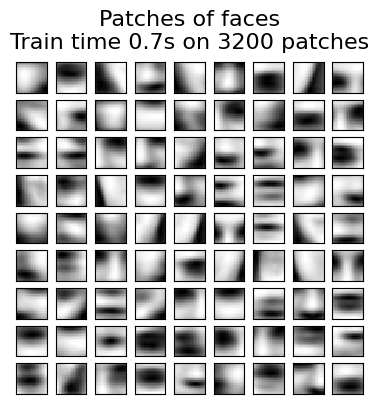

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4.2, 4))
for i, patch in enumerate(kmeans.cluster_centers_):
    plt.subplot(9, 9, i + 1)
    plt.imshow(patch.reshape(patch_size), cmap=plt.cm.gray, interpolation="nearest")
    plt.xticks(())
    plt.yticks(())


plt.suptitle(
    "Patches of faces\nTrain time %.1fs on %d patches" % (dt, 8 * len(faces.images)),
    fontsize=16,
)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

plt.show()